In [54]:
%pylab inline
import pandas as pd
import mdtraj as md
from sklearn.cluster import KMeans
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


In [3]:
h_unbound_rmsd_to_u = pd.read_csv('h_unbound_to_u.csv').values.ravel()

h_unbound_q = pd.read_csv('h_unbound_q.csv').values.ravel()

In [4]:
f_h = vstack((h_unbound_rmsd_to_u, h_unbound_q))
kmeans = KMeans(n_clusters=20).fit(f_h.T)
kmeans.labels_

array([9, 9, 9, ..., 0, 0, 0], dtype=int32)

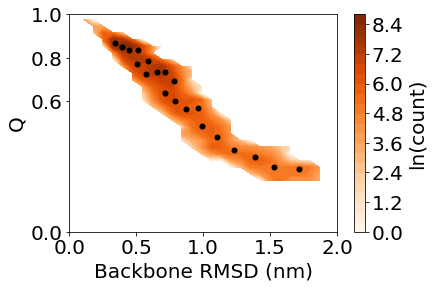

In [6]:
z,x,y = np.histogram2d(h_unbound_rmsd_to_u, h_unbound_q, bins=25)
extent = [x[0], x[-1], y[0], y[-1]]
contourf(np.log(z.T), 25, cmap=plt.cm.Oranges, extent=extent)
xlabel('Backbone RMSD (nm)')
xlim(0,2)
xticks(arange(0,2.1,0.5))
ylabel('Q')
ylim(0,1)
yticks([0,0.6,0.8,1.0])
clb = colorbar()
clb.set_label('ln(count)')

cc_x = kmeans.cluster_centers_[:,0]
cc_y = kmeans.cluster_centers_[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
savefig('fig_src/q.png', format='png', dpi=600, bbox_inches="tight")

In [33]:
centerid = []
for i in range(0,20):
    rmsd_index = np.where((h_unbound_rmsd_to_u>kmeans.cluster_centers_[i,0]-0.01) & (h_unbound_rmsd_to_u<kmeans.cluster_centers_[i,0]+0.01))[0]
    q_index = np.where((h_unbound_q>kmeans.cluster_centers_[i,1]-0.002) & (h_unbound_q<kmeans.cluster_centers_[i,1]+0.002))[0]
    mask = np.in1d(rmsd_index, q_index)
    centerid.append(rmsd_index[mask][-1])
print centerid

[62579, 60107, 33074, 49840, 52127, 54046, 60871, 62810, 60298, 51024, 57260, 61859, 48161, 39041, 60356, 48277, 42052, 57814, 60118, 62220]


In [52]:
traj_index = []
traj_index_m = array(range(0,h_unbound_rmsd_to_u.size)).reshape(21,h_unbound_rmsd_to_u.size/21)
for i in centerid:
    traj_index.append((np.where(traj_index_m==i)[0][0],np.where(traj_index_m==i)[1][0]))
print traj_index

[(20, 2559), (20, 87), (11, 63), (16, 1824), (17, 1110), (18, 28), (20, 851), (20, 2790), (20, 278), (17, 7), (19, 241), (20, 1839), (16, 145), (13, 28), (20, 336), (16, 261), (14, 38), (19, 795), (20, 98), (20, 2200)]


In [55]:
temps = ('300k','300k1','300k2','373k','373k1','373k2','423k','423k1','423k2','473k','473k1','473k2','523k','523k1','523k2','573k','573k1','573k2','623k','623k1','623k2')
h_u_top = md.load('/home/gerry/heat/structures/H-unbound.pdb')

In [57]:
for i,(t,f) in enumerate(traj_index):
    traj = md.load_xtc('/home/gerry/heat/pro/H_unbound/H_unbound_pro_'+temps[t]+'.xtc', top=h_u_top)
    traj[f].save_pdb('centers/'+str(i)+'.pdb')